In [16]:
from sklearn.datasets import load_digits
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score    #计算准确率
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB    #导入三种朴素贝叶斯分类器
from sklearn.metrics import confusion_matrix    #导入混淆矩阵
import seaborn as sns

In [7]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


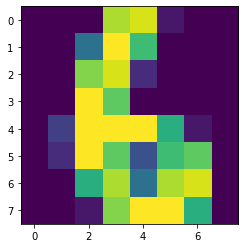

In [9]:
plt.imshow(digits.images[1223])
plt.show()

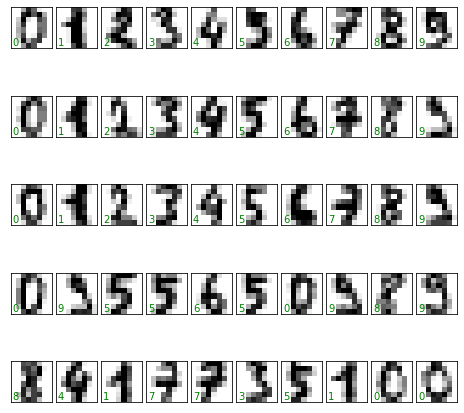

In [13]:
'''绘制手写数字图像'''
fig,axes = plt.subplots(5,10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
#     ax.imshow(digits.images[i])
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')
plt.show()

In [15]:
X = digits.data
Y = digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

In [18]:
def model(model):
    model.fit(Xtrain,Ytrain)
    y_model = model.predict(Xtest)
    model_acc = accuracy_score(Ytest,y_model)
    return y_model, model_acc

def conf_matrix(model):
    plt.figure(figsize=(8, 6))
    mat = confusion_matrix(Ytest,model)
    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

Accuracy is 0.8222222222222222


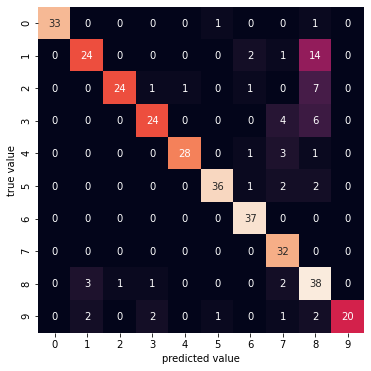

In [22]:
"""高斯朴素贝叶斯分类器"""
guass_mod,guass_acc = model(GaussianNB())
print(f"Accuracy is {guass_acc}")
conf_matrix(guass_mod)

Accuracy is 0.9194444444444444


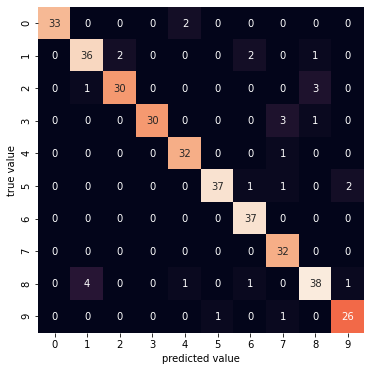

In [23]:
"""多项式朴素贝叶斯分类器"""
multi_mod,multi_acc = model(MultinomialNB())
print(f"Accuracy is {multi_acc}")
conf_matrix(multi_mod)

Accuracy is 0.8416666666666667


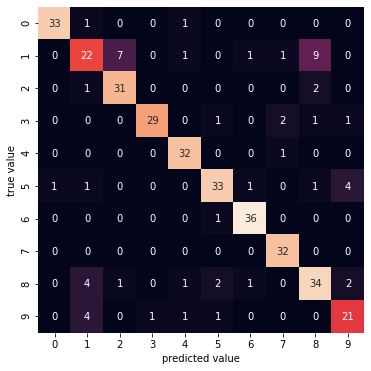

In [24]:
BernoulliNB
"""伯努利朴素贝叶斯分类器"""
ber_mod,ber_acc = model(BernoulliNB())
print(f"Accuracy is {ber_acc}")
conf_matrix(ber_mod)